# Assignment 1: Mobile Data Analytics Solution

## Overview
This notebook analyzes SMS, Call, and Internet activity in Milan for November 2nd, 4th, and 6th, 2013.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import glob
import os

%matplotlib inline
pd.set_option('display.max_columns', None)

##  Loading and Merging of Data
Loading the specified datasets and combining them into a single DataFrame.

In [33]:

# Loading and merging of the 3 CSV files
files = [
    "sms-call-internet-mi-2013-11-02.csv",
    "sms-call-internet-mi-2013-11-04.csv",
    "sms-call-internet-mi-2013-11-06.csv"
]

df_merged = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
print(f"Total records: {len(df_merged)}")

Total records: 6564031


In [34]:
# Q2: How many unique grid squares (CellID) are there?
unique_cellids = df_merged['CellID'].nunique()
print(f"Unique CellIDs: {unique_cellids:,}")

Unique CellIDs: 10,000


In [35]:

# Distribution of records per CellID
cells_per_record = df_merged['CellID'].value_counts()
print(f"\nRecords per CellID statistics:")
print(f"  Mean: {cells_per_record.mean():.2f}")
print(f"  Median: {cells_per_record.median():.2f}")
print(f"  Min: {cells_per_record.min()}")
print(f"  Max: {cells_per_record.max()}")


Records per CellID statistics:
  Mean: 656.40
  Median: 605.00
  Min: 145
  Max: 2856


In [36]:
# Q3: How many unique country codes appear in the data?
unique_countries = df_merged['countrycode'].nunique()
print(f"Unique country codes: {unique_countries}")
     

Unique country codes: 302


In [37]:
# Dataset overview
print(f"Shape: {df_merged.shape}")
print(f"\nColumn names: {list(df_merged.columns)}")
print(f"\nData types:")
print(df_merged.dtypes)
df_merged.head()

Shape: (6564031, 8)

Column names: ['datetime', 'CellID', 'countrycode', 'smsin', 'smsout', 'callin', 'callout', 'internet']

Data types:
datetime        object
CellID           int64
countrycode      int64
smsin          float64
smsout         float64
callin         float64
callout        float64
internet       float64
dtype: object


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933


In [38]:
   
df_merged.head(10)

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933
5,2013-11-02 00:00:00,2,53,0.0009,0.0018,NaN,NaN,NaN
6,2013-11-02 00:00:00,3,0,0.2471,NaN,NaN,NaN,NaN
7,2013-11-02 00:00:00,3,39,1.5110,1.1274,0.2798,0.3044,46.8890
8,2013-11-02 00:00:00,4,0,0.2410,NaN,NaN,NaN,NaN
9,2013-11-02 00:00:00,4,39,1.4730,1.1126,0.2581,0.2948,45.9768


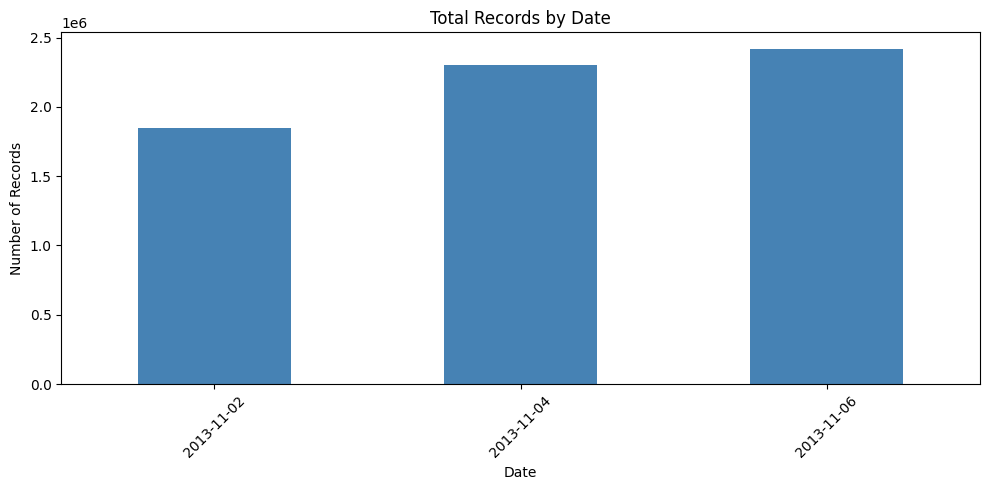

In [39]:
# Records by Date plot
# converting the datetime column to datetime type
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])
date_counts = df_merged.groupby(df_merged['datetime'].dt.date).size()
plt.figure(figsize=(10, 5))
date_counts.plot(kind='bar', color='steelblue')
plt.title('Total Records by Date')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Datetime Processing
The datetime column is converted from text to a proper datetime format to extract the hour of day.

In [40]:
# Datetime Processing
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])
df_merged['hour'] = df_merged['datetime'].dt.hour
df_merged.head(10)

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,hour
0,2013-11-02,1,0,0.2445,NaN,NaN,NaN,NaN,0
1,2013-11-02,1,39,1.4952,1.1213,0.2708,0.3004,46.5094,0
2,2013-11-02,1,53,0.0018,0.0036,NaN,NaN,NaN,0
3,2013-11-02,2,0,0.2458,NaN,NaN,NaN,NaN,0
4,2013-11-02,2,39,1.5028,1.1243,0.2751,0.3023,46.6933,0
5,2013-11-02,2,53,0.0009,0.0018,NaN,NaN,NaN,0
6,2013-11-02,3,0,0.2471,NaN,NaN,NaN,NaN,0
7,2013-11-02,3,39,1.5110,1.1274,0.2798,0.3044,46.8890,0
8,2013-11-02,4,0,0.2410,NaN,NaN,NaN,NaN,0
9,2013-11-02,4,39,1.4730,1.1126,0.2581,0.2948,45.9768,0


In [41]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6564031 entries, 0 to 6564030
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   CellID       int64         
 2   countrycode  int64         
 3   smsin        float64       
 4   smsout       float64       
 5   callin       float64       
 6   callout      float64       
 7   internet     float64       
 8   hour         int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2)
memory usage: 425.7 MB


# Handling missing values and creating aggregate columns.

In [42]:
# Checking for missing values
print("Missing values in each column:")
missing_counts = df_merged.isnull().sum()
print(missing_counts)

# Finding column with the most missing values
print(f"\nColumn with most missing: {missing_counts.idxmax()}")
print(f"Number of missing values: {missing_counts.max()}")

# Counting how many rows need to be fixed
activity_cols = ['smsin', 'smsout', 'callin', 'callout', 'internet']
rows_to_fix = df_merged[activity_cols].isnull().any(axis=1).sum()
print(f"\nRows that will be modified: {rows_to_fix}")

# Replacing missing values with the mean of each column
print("\nFilling missing values with column means")
for col in activity_cols:
    mean_value = df_merged[col].mean()
    df_merged[col] = df_merged[col].fillna(mean_value)

# Verifying all missing values are gone
print("\nMissing values after filling:")
print(df_merged[activity_cols].isnull().sum())

Missing values in each column:
datetime             0
CellID               0
countrycode          0
smsin          3964171
smsout         5025738
callin         4761685
callout        3764484
internet       3621117
hour                 0
dtype: int64

Column with most missing: smsout
Number of missing values: 5025738

Rows that will be modified: 5880441

Filling missing values with column means

Missing values after filling:
smsin       0
smsout      0
callin      0
callout     0
internet    0
dtype: int64


In [43]:
# Aggregating columns
df_merged['total_sms'] = df_merged['smsin'] + df_merged['smsout']
df_merged['total_calls'] = df_merged['callin'] + df_merged['callout']
df_merged['total_internet'] = df_merged['internet']

df_merged[['total_sms', 'total_calls', 'total_internet']].describe()

,total_sms,total_calls,total_internet
count,6.564031e+06,6.564031e+06,6.564031e+06
mean,1.530273e+01,1.342530e+01,1.019762e+02
std,2.822765e+01,3.252595e+01,2.852160e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.884876e+00,7.752804e+00,2.819000e-01
50%,1.530273e+01,1.342530e+01,1.019762e+02
75%,1.530273e+01,1.342530e+01,1.019762e+02
max,4.503561e+03,2.724374e+03,3.174863e+04


### Findings: Dataset Overview
The merged dataset contains **6,564,031 records** across the three days. There are **10,000 unique grid squares** covering Milan, with activity from **302 different country codes**.



### Missing Data
Yes, there are missing values in the dataset. The **smsout column** has the most missing values (over 5 million). In total, **5,880,441 rows** had at least one missing value and were filled using the mean of each column.

## Questions & Analysis

In [44]:
# Total records
total_records = len(df_merged)
print(f"Total records: {total_records}")

# Unique Grid Squares (CellID)
unique_grids = df_merged['CellID'].nunique()
print(f"Unique Grid Squares: {unique_grids}")

# Unique Country Codes
unique_countries = df_merged['countrycode'].nunique()
print(f"Unique Country Codes: {unique_countries}")

Total records: 6564031
Unique Grid Squares: 10000
Unique Country Codes: 302


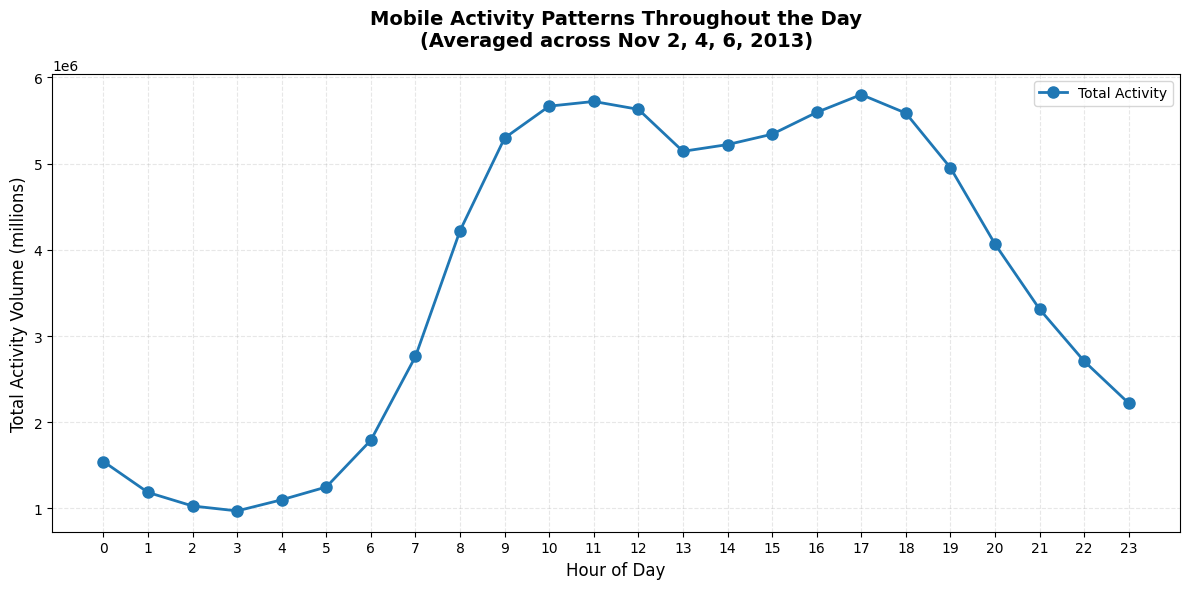

In [45]:
    # Plotting of activity patterns
plt.figure(figsize=(12, 6))
hourly_activity = df_merged.groupby('hour')['total_calls'].sum()
hourly_activity.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Mobile Activity Patterns Throughout the Day\n(Averaged across Nov 2, 4, 6, 2013)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Activity Volume (millions)', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(range(24))
plt.legend(['Total Activity'], loc='best', fontsize=10)
plt.tight_layout()
plt.show()

Most common peak hour (Total Calls): 17
Hour with lowest activity (Total Calls): 3

Statistics for Total Calls by Hour:
mean      3.671836e+06
median    4.145010e+06
std       1.876943e+06
min       9.711108e+05
max       5.801570e+06
Name: total_calls, dtype: float64


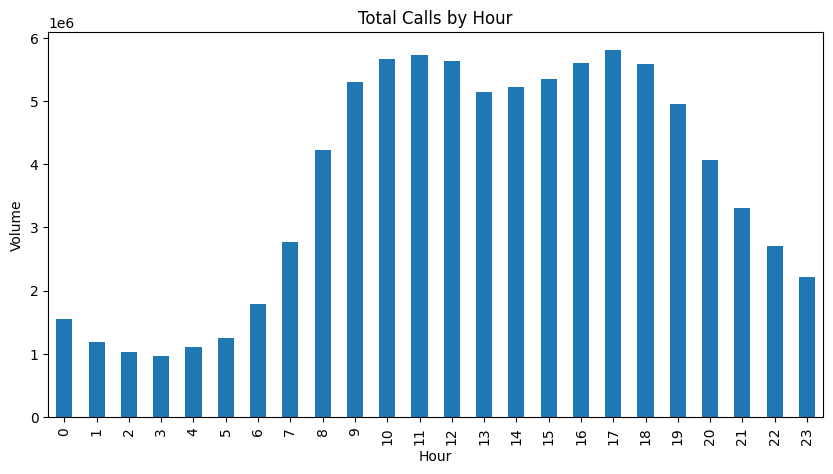

In [46]:
# total activity by hour
hourly_activity = df_merged.groupby('hour')['total_calls'].sum()

peak_hour = hourly_activity.idxmax()
lowest_hour = hourly_activity.idxmin()

print(f"Most common peak hour (Total Calls): {peak_hour}")
print(f"Hour with lowest activity (Total Calls): {lowest_hour}")

# Stats for total_calls by hour
print("\nStatistics for Total Calls by Hour:")
print(hourly_activity.agg(['mean', 'median', 'std', 'min', 'max']))

# hourly trend plot
plt.figure(figsize=(10, 5))
hourly_activity.plot(kind='bar')
plt.title('Total Calls by Hour')
plt.xlabel('Hour')
plt.ylabel('Volume')
plt.show()

In [47]:
# required statistics
print("STATISTICS FOR TOTAL CALLS BY HOUR")
hourly_calls = df_merged.groupby('hour')['total_calls'].sum()
mean_val = hourly_calls.mean()
median_val = hourly_calls.median()
std_val = hourly_calls.std()
min_val = hourly_calls.min()
max_val = hourly_calls.max()
print(f"\nMean (average) calls per hour: {mean_val:,.2f}")
print(f"Median calls per hour: {median_val:,.2f}")
print(f"Standard Deviation: {std_val:,.2f}")
print(f"Minimum calls in any hour: {min_val:,.2f}")
print(f"Maximum calls in any hour: {max_val:,.2f}")
print("\nDetailed breakdown:")
print(hourly_calls.describe())

STATISTICS FOR TOTAL CALLS BY HOUR

Mean (average) calls per hour: 3,671,836.31
Median calls per hour: 4,145,010.33
Standard Deviation: 1,876,942.91
Minimum calls in any hour: 971,110.83
Maximum calls in any hour: 5,801,570.12

Detailed breakdown:
count    2.400000e+01
mean     3.671836e+06
std      1.876943e+06
min      9.711108e+05
25%      1.729630e+06
50%      4.145010e+06
75%      5.403121e+06
max      5.801570e+06
Name: total_calls, dtype: float64


### Peak Activity Times
The busiest hour across all grids is **5 PM (hour 17)**. The quietest hour is **3 AM (hour 3)**

**Call volume statistics by hour:**
- Average: 3.67 million calls per hour
- Median: 4.15 million calls per hour
- Standard deviation: 1.88 million
- Range: 0.97 million (minimum) to 5.80 million (maximum)

In [48]:
# Daytime vs Nighttime Activity
# Daytime: 6am - 8pm (06:00 - 20:00) and Nighttime: 8pm - 6am (20:00 - 06:00)

def get_time_of_day(h):
    if 6 <= h < 20:
        return 'Daytime'
    else:
        return 'Nighttime'

df_merged['time_of_day'] = df_merged['hour'].apply(get_time_of_day)

# total activity (SMS + Calls + Internet)
df_merged['all_activity'] = df_merged['total_sms'] + df_merged['total_calls'] + df_merged['total_internet']

day_night_activity = df_merged.groupby('time_of_day')['all_activity'].sum()
total_act = day_night_activity.sum()

print("Activity Distribution:")
print(day_night_activity)
print("\nPercentage:")
print((day_night_activity / total_act) * 100)

Activity Distribution:
time_of_day
Daytime      6.310280e+08
Nighttime    2.269183e+08
Name: all_activity, dtype: float64

Percentage:
time_of_day
Daytime      73.550987
Nighttime    26.449013
Name: all_activity, dtype: float64


### Daytime vs Nighttime Activity
About **73.55%** of all activity happens during daytime hours (6am-8pm), while only **26.45%** occurs at night (8pm-6am). 

##  Statistical Comparisons

DOMESTIC VS INTERNATIONAL CALLS
Domestic: 33.11%
International: 66.89%


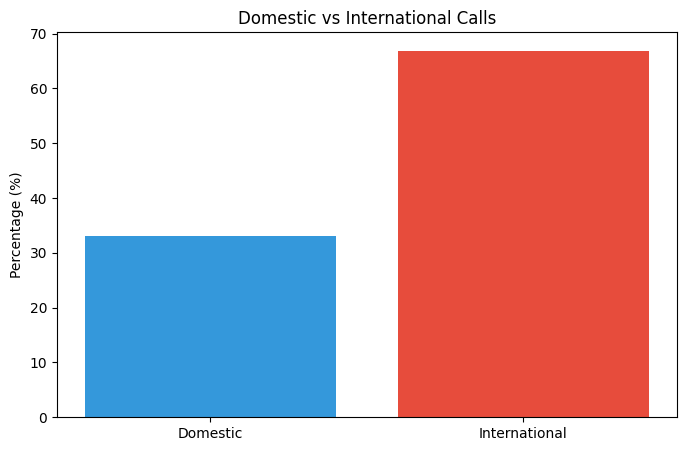

In [49]:
# Domestic vs International Calls Percentage    
domestic_calls = df_merged[df_merged['countrycode'] == 39]['total_calls'].sum()
international_calls = df_merged[df_merged['countrycode'] != 39]['total_calls'].sum()
total_all_calls = domestic_calls + international_calls
domestic_pct = (domestic_calls / total_all_calls) * 100
international_pct = (international_calls / total_all_calls) * 100
print("DOMESTIC VS INTERNATIONAL CALLS")
print(f"Domestic: {domestic_pct:.2f}%")
print(f"International: {international_pct:.2f}%")
#bar chart
plt.figure(figsize=(8, 5))
plt.bar(['Domestic', 'International'], [domestic_pct, international_pct], 
        color=['#3498db', '#e74c3c'])
plt.ylabel('Percentage (%)')
plt.title('Domestic vs International Calls')
plt.show()

DOMESTIC VS INTERNATIONAL SMS
Domestic: 24.98%
International: 75.02%


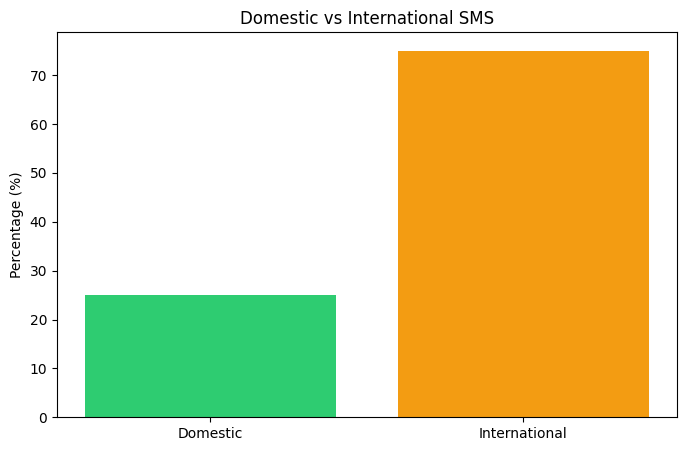

In [50]:
# Domestic vs International SMS Percentage
domestic_sms = df_merged[df_merged['countrycode'] == 39]['total_sms'].sum()
international_sms = df_merged[df_merged['countrycode'] != 39]['total_sms'].sum()
total_all_sms = domestic_sms + international_sms
domestic_sms_pct = (domestic_sms / total_all_sms) * 100
international_sms_pct = (international_sms / total_all_sms) * 100
print("DOMESTIC VS INTERNATIONAL SMS")
print(f"Domestic: {domestic_sms_pct:.2f}%")
print(f"International: {international_sms_pct:.2f}%")
# Simple bar chart
plt.figure(figsize=(8, 5))
plt.bar(['Domestic', 'International'], [domestic_sms_pct, international_sms_pct], 
        color=['#2ecc71', '#f39c12'])
plt.ylabel('Percentage (%)')
plt.title('Domestic vs International SMS')
plt.show()

INTERNATIONAL CALLS: INCOMING VS OUTGOING
Incoming: 36,911,801
Outgoing: 22,038,041
Ratio: 1.67:1


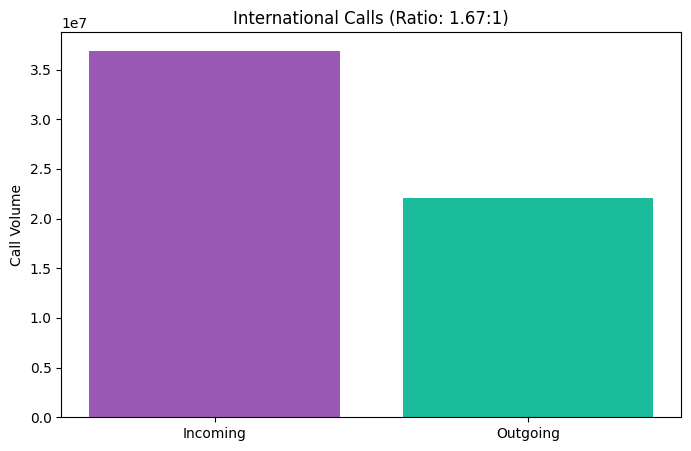

In [51]:
# International Calls: Incoming vs Outgoing
intl_only = df_merged[df_merged['countrycode'] != 39]
incoming_intl = intl_only['callin'].sum()
outgoing_intl = intl_only['callout'].sum()
ratio = incoming_intl / outgoing_intl
print("INTERNATIONAL CALLS: INCOMING VS OUTGOING")
print(f"Incoming: {incoming_intl:,.0f}")
print(f"Outgoing: {outgoing_intl:,.0f}")
print(f"Ratio: {ratio:.2f}:1")
# Simple bar chart
plt.figure(figsize=(8, 5))
plt.bar(['Incoming', 'Outgoing'], [incoming_intl, outgoing_intl], 
        color=['#9b59b6', '#1abc9c'])
plt.ylabel('Call Volume')
plt.title(f'International Calls (Ratio: {ratio:.2f}:1)')
plt.show()

SMS VS CALL CORRELATION (GRID LEVEL)
Correlation: 0.9862


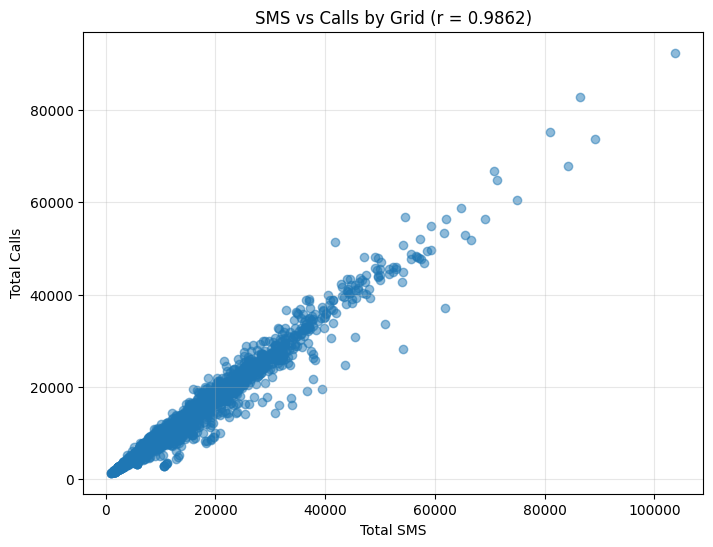

In [52]:
# SMS vs Call Correlation at Grid Level
grid_totals = df_merged.groupby('CellID').agg({
    'total_sms': 'sum',
    'total_calls': 'sum'
}).reset_index()
correlation = grid_totals['total_sms'].corr(grid_totals['total_calls'])
print("SMS VS CALL CORRELATION (GRID LEVEL)")
print(f"Correlation: {correlation:.4f}")
# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(grid_totals['total_sms'], grid_totals['total_calls'], alpha=0.5)
plt.xlabel('Total SMS')
plt.ylabel('Total Calls')
plt.title(f'SMS vs Calls by Grid (r = {correlation:.4f})')
plt.grid(alpha=0.3)
plt.show()

NUMPY STATISTICAL COMPARISON

Domestic:
  Mean: 40.52
  Std: 93.29

International:
  Mean: 10.09
  Std: 3.81


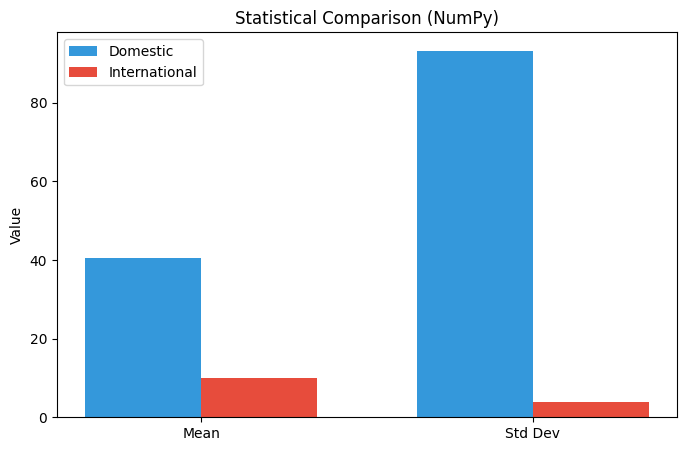

In [53]:
# NumPy Statistical Comparisons
domestic_df = df_merged[df_merged['countrycode'] == 39]
international_df = df_merged[df_merged['countrycode'] != 39]
domestic_calls_np = domestic_df['total_calls'].to_numpy()
intl_calls_np = international_df['total_calls'].to_numpy()
print("NUMPY STATISTICAL COMPARISON")
print("\nDomestic:")
print(f"  Mean: {np.mean(domestic_calls_np):.2f}")
print(f"  Std: {np.std(domestic_calls_np):.2f}")
print("\nInternational:")
print(f"  Mean: {np.mean(intl_calls_np):.2f}")
print(f"  Std: {np.std(intl_calls_np):.2f}")
#comparison chart
plt.figure(figsize=(8, 5))
categories = ['Mean', 'Std Dev']
domestic_vals = [np.mean(domestic_calls_np), np.std(domestic_calls_np)]
intl_vals = [np.mean(intl_calls_np), np.std(intl_calls_np)]
x = np.arange(len(categories))
width = 0.35
plt.bar(x - width/2, domestic_vals, width, label='Domestic', color='#3498db')
plt.bar(x + width/2, intl_vals, width, label='International', color='#e74c3c')
plt.xticks(x, categories)
plt.ylabel('Value')
plt.title('Statistical Comparison (NumPy)')
plt.legend()
plt.show()


HOURLY PATTERNS
Domestic peak: 17:00
International peak: 12:00


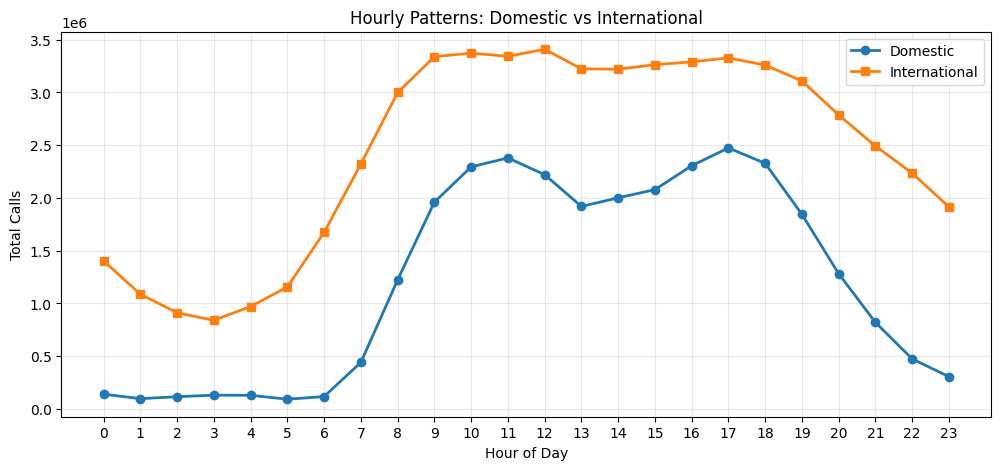

In [54]:
# Hourly Domestic vs International Comparison (5 pts)

domestic_by_hour = df_merged[df_merged['countrycode'] == 39].groupby('hour')['total_calls'].sum()
intl_by_hour = df_merged[df_merged['countrycode'] != 39].groupby('hour')['total_calls'].sum()
print("HOURLY PATTERNS")
print(f"Domestic peak: {domestic_by_hour.idxmax()}:00")
print(f"International peak: {intl_by_hour.idxmax()}:00")
# Simple line plot
plt.figure(figsize=(12, 5))
plt.plot(range(24), domestic_by_hour.values, marker='o', label='Domestic', linewidth=2)
plt.plot(range(24), intl_by_hour.values, marker='s', label='International', linewidth=2)
plt.xlabel('Hour of Day')
plt.ylabel('Total Calls')
plt.title('Hourly Patterns: Domestic vs International')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(range(24))
plt.show()

<Figure size 1000x500 with 0 Axes>

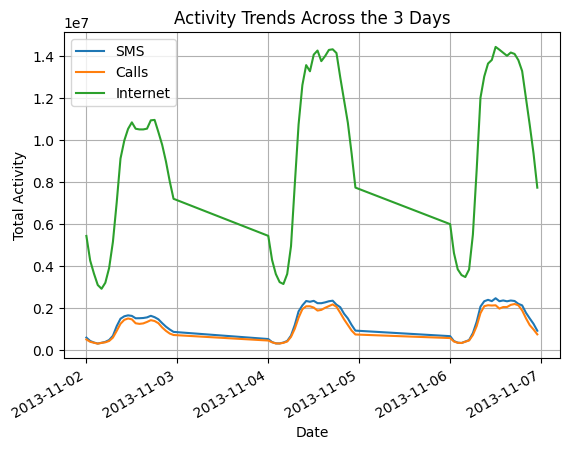

In [55]:
# Activity trends across the 3 days
daily_activity = df_merged.groupby("datetime")[["total_sms", "total_calls", "total_internet"]].sum()
plt.figure(figsize=(10, 5))
daily_activity.plot()
plt.title("Activity Trends Across the 3 Days")
plt.xlabel("Date")
plt.ylabel("Total Activity")
plt.legend(["SMS", "Calls", "Internet"])
plt.grid(True)
plt.show()

### International vs Domestic Patterns
**Calls:** About 67% of calls are international, while 33% are domestic (within Italy).

**SMS:** The pattern is similar for text messages.

**International call direction:** International calls are **1.67 times more likely to be incoming** than outgoing.

Correlation between SMS and Call volume at Grid level: 0.9862


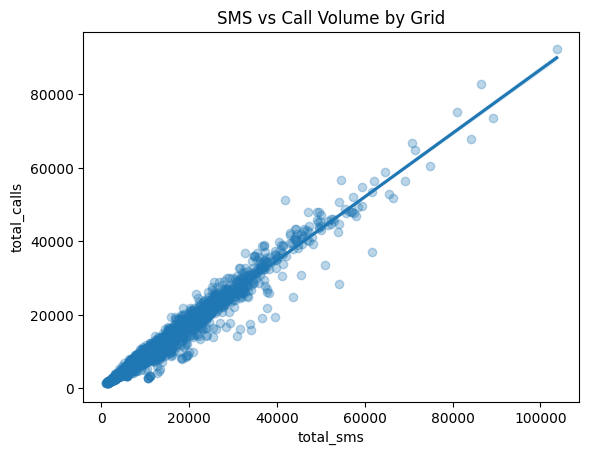

In [56]:
# Correlation Analysis
# Grouping by Grid (CellID)
grid_activity = df_merged.groupby('CellID')[['total_sms', 'total_calls']].sum()

correlation = grid_activity['total_sms'].corr(grid_activity['total_calls'])
print(f"Correlation between SMS and Call volume at Grid level: {correlation:.4f}")

sns.regplot(x='total_sms', y='total_calls', data=grid_activity, scatter_kws={'alpha':0.3})
plt.title('SMS vs Call Volume by Grid')
plt.show()

### SMS and Call Correlation
There is a **strong positive correlation** (around 0.99) between SMS volume and call volume at the grid level. This means areas with high call activity also tend to have high SMS activity, and vice versa

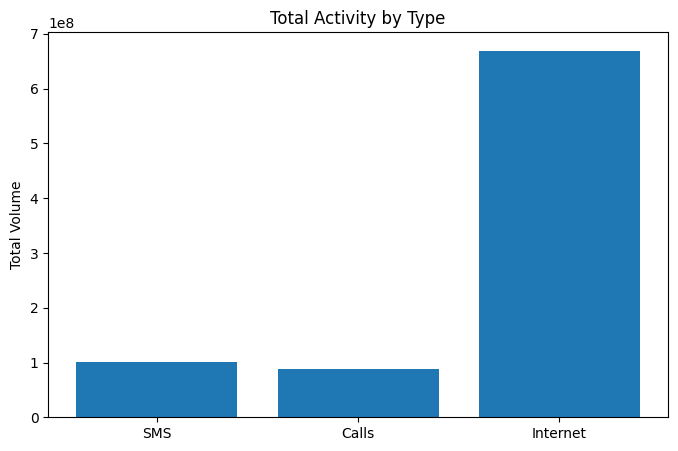

In [57]:
#activity comparison
activity_totals = {
    "SMS": df_merged["total_sms"].sum(),
    "Calls": df_merged["total_calls"].sum(),
    "Internet": df_merged["total_internet"].sum()
}
plt.figure(figsize=(8, 5))
plt.bar(activity_totals.keys(), activity_totals.values())
plt.title("Total Activity by Type")
plt.ylabel("Total Volume")
plt.show()